In [2]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import *

In [3]:
df = read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df['bmi'].fillna(value=mean(df['bmi']), inplace=True)

In [12]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
cate_df = df.select_dtypes(include='object')

In [17]:
cate_df.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [19]:
from sklearn.preprocessing import *

In [20]:
lb_make = LabelEncoder()

In [25]:
df['gender_numeric'] = lb_make.fit_transform(cate_df['gender'])

In [26]:
df['ever_married_numeric'] = lb_make.fit_transform(cate_df['ever_married'])

In [27]:
df['work_type_numeric'] = lb_make.fit_transform(cate_df['work_type'])

In [28]:
df['Residence_type_numeric'] = lb_make.fit_transform(cate_df['Residence_type'])

In [29]:
df['smoking_status_numeric'] = lb_make.fit_transform(cate_df['smoking_status'])

In [30]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_nume,gender_numeric,ever_married_numeric,work_type_numeric,Residence_type_numeric,smoking_status_numeric
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,0,1,3,0,2


In [39]:
df_numeric = df.drop(labels=df.select_dtypes(include='object').columns, axis=1)

In [40]:
df_numeric.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_nume,gender_numeric,ever_married_numeric,work_type_numeric,Residence_type_numeric,smoking_status_numeric
0,9046,67.0,0,1,228.69,36.600000,1,1,1,1,2,1,1
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,3,0,2
2,31112,80.0,0,1,105.92,32.500000,1,1,1,1,2,0,2
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,2,1,3
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,3,0,2


<AxesSubplot:>

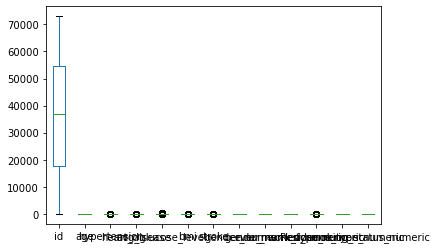

In [43]:
df_numeric.plot(kind='box')

In [50]:
df_numeric.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_nume', 'gender_numeric',
       'ever_married_numeric', 'work_type_numeric', 'Residence_type_numeric',
       'smoking_status_numeric'],
      dtype='object')

In [52]:
df_numeric['stroke'].unique()

array([1, 0], dtype=int64)

In [55]:
X = asarray(df_numeric.drop(labels='stroke', axis=1))
y = asarray(df_numeric['stroke'])

In [58]:
from sklearn.model_selection import *
from sklearn.neighbors import *
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, )

In [60]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9475743348982786

In [61]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators = 10,
                            max_samples = .5,
                            bootstrap=True,
                            random_state=5
                    )

In [62]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

0.9491392801251957

In [63]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=False, random_state=3) 
pasting_knn.fit(X_train, y_train)
pasting_knn.score(X_test, y_test)

0.9491392801251957

In [69]:
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.metrics import *
import pydotplus

In [70]:
rand_clf = RandomForestClassifier()

In [71]:
grid_param = {
    'criterion' : ["gini", "entropy"],
    'n_estimators' : [90, 100, 115],
    'max_depth' : range(15,20),
    'max_features' : ['auto', 'log2']   
}